In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\MPP_Dataset\Train.csv")

In [3]:
data.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [4]:
data.shape

(18208, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [6]:
np.sum(data.isnull())

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [7]:
# Now we use a techniqe to drop constant features from the data set
#why we are removing constant features because these features are not imortant

In [8]:
features=data.iloc[:,:-1]
label=data.iloc[:,-1]

In [9]:
features.shape,label.shape

((18208, 11), (18208,))

In [10]:
features.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507


In [11]:
label.head()

0    4
1    4
2    4
3    5
4    3
Name: popularity, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.3,random_state=0)

In [13]:
X_train.shape, X_test.shape

((12745, 11), (5463, 11))

In [14]:
X_train.corr()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
Store_Ratio,1.000000,0.467543,0.048362,0.599363,-0.105634,-0.474645,-0.461093,-0.039476,0.622599,0.111185,-0.051309
Basket_Ratio,0.467543,1.000000,0.050688,0.827021,-0.118981,-0.821750,-0.615095,0.272499,0.526086,0.245703,0.102892
Category_1,0.048362,0.050688,1.000000,0.042723,-0.129204,-0.047311,-0.028603,0.014921,0.038146,-0.005676,-0.011506
Store_Score,0.599363,0.827021,0.042723,1.000000,-0.089366,-0.725242,-0.730927,0.141319,0.517391,0.258624,0.087841
Category_2,-0.105634,-0.118981,-0.129204,-0.089366,1.000000,0.104967,0.027999,-0.035713,-0.051585,-0.047512,-0.008729
Store_Presence,-0.474645,-0.821750,-0.047311,-0.725242,0.104967,1.000000,0.572116,-0.192194,-0.429387,-0.212919,-0.071410
Score_1,-0.461093,-0.615095,-0.028603,-0.730927,0.027999,0.572116,1.000000,-0.101119,-0.478529,-0.198437,-0.121610
Score_2,-0.039476,0.272499,0.014921,0.141319,-0.035713,-0.192194,-0.101119,1.000000,0.028455,0.021866,-0.009331
Score_3,0.622599,0.526086,0.038146,0.517391,-0.051585,-0.429387,-0.478529,0.028455,1.000000,0.177026,0.018462
Score_4,0.111185,0.245703,-0.005676,0.258624,-0.047512,-0.212919,-0.198437,0.021866,0.177026,1.000000,0.031771


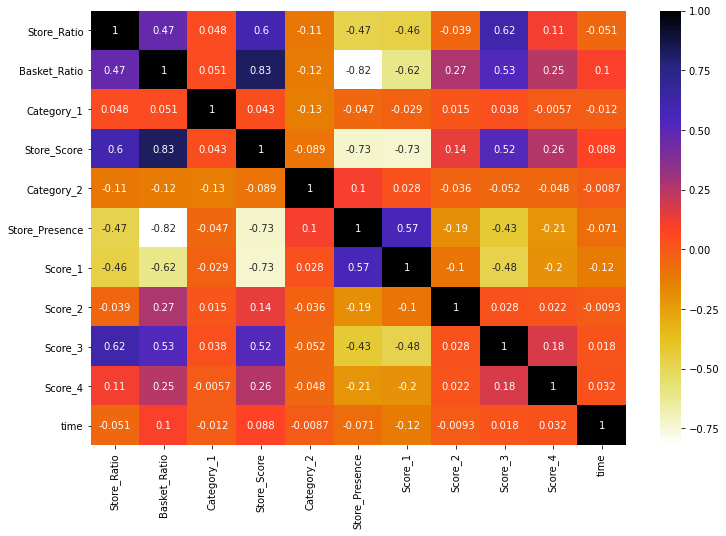

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [16]:
#now we will select highly correlated features and drop them
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#abs convert negative values into positive and select that
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

2

In [18]:
corr_features

{'Store_Presence', 'Store_Score'}

## in the above datasset Store_presence and Store_Score are highly correlated  with 0.8 threshold so we need to drop them

In [19]:
X_train.drop(corr_features,axis=1).head()

,Store_Ratio,Basket_Ratio,Category_1,Category_2,Score_1,Score_2,Score_3,Score_4,time
6069,0.795,0.8800,2,1,0.8310,0.3080,0.335,123.004,439426
11155,0.669,0.0252,7,1,0.9600,0.0969,0.828,131.293,116835
12777,0.752,0.8610,9,0,0.0000,0.1260,0.666,113.396,182118
16599,0.735,0.7910,8,1,0.0000,0.2330,0.425,160.008,125440
3254,0.620,0.9060,11,0,0.0206,0.1830,0.398,123.047,221773
